# Filters

In [107]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as colors
import cv2

## Load and plot the image

### Convert the image to binary image

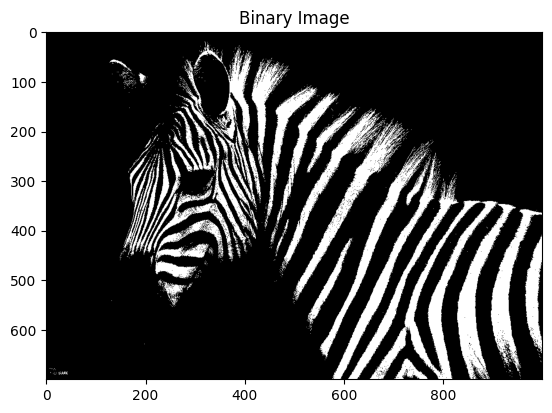

In [108]:
img = cv2.imread(r"C:\Users\nessl\OneDrive\Desktop\Studium\Semester 4\Bildverstehen\Praktikum\Praktikum 4\Zebra.jpg", cv2.IMREAD_GRAYSCALE)
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

plt.imshow(img, cmap='gray')
plt.title('Binary Image')
plt.show()

### Implement the dilation method

In [109]:
def dil_filter(img, l):
    for i in range(l):
        img = np.pad(img, ((1, 1), (1, 1)), mode='constant', constant_values=0)
        rows, cols = len(img), len(img[0])
        result_img = [[0] * cols for _ in range(rows)]

        for i in range(rows):
            for j in range(cols):
                max_value = img[i][j]
            
                for x in range(max(0, i-1), min(rows, i+2)):
                    for y in range(max(0, j-1), min(cols, j+2)):
                        max_value = max(max_value, img[x][y])
                result_img[i][j] = max_value   
    return result_img


In [110]:
def ero_filter(img, l):
    for i in range(l):
        img = np.pad(img, ((1, 1), (1, 1)), mode='constant', constant_values=0)
        rows, cols = len(img), len(img[0])
        result_img = [[0] * cols for _ in range(rows)]

        for i in range(rows):
            for j in range(cols):
                min_value = float('inf')
        
                for x in range(max(0, i-1), min(rows, i+2)):
                    for y in range(max(0, j-1), min(cols, j+2)):
                        min_value = min(min_value, img[x][y])
                
                result_img[i][j] = min_value

    return result_img


### Implement the erosion method

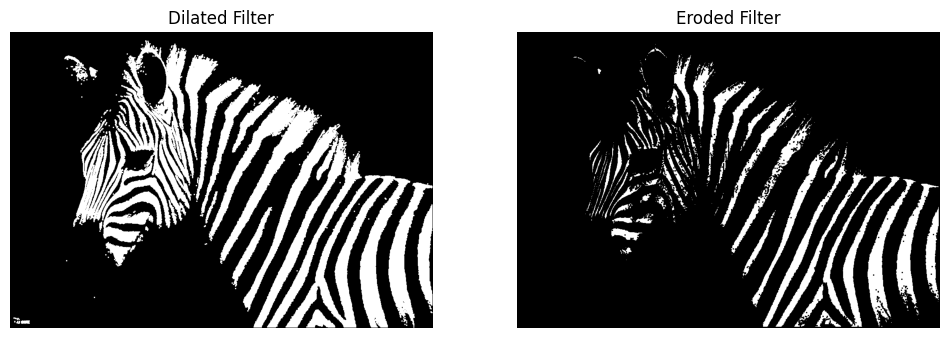

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(dil_filter(img, 2), cmap='gray')
axs[0].set_title('Dilated Filter')
axs[0].axis('off') 

axs[1].imshow(ero_filter(img, 2), cmap='gray')
axs[1].set_title('Eroded Filter')
axs[1].axis('off')

plt.show()

## Opening and Closing

In [112]:
import random, copy

def add_noise(binary_image, max_noise_elements=50, max_noise_size=1):
    dc_img = copy.deepcopy(binary_image)
    
    h, w = binary_image.shape
    
    for i in range(max_noise_elements):
        # random row
        rand_row = random.randint(0, h)
        rand_col = random.randint(0, w)
        
        # random cluster (like a kernel)
        left = max(0, rand_row - max_noise_size)
        top = max(0, rand_col - max_noise_size)
        right = min(w-1, rand_row + max_noise_size)
        bottom = min(h-1, rand_col + max_noise_size)
        
        # only if no neighbor is already filled with 1s
        if dc_img[top:bottom, left:right].sum() == 0:
            for height in range(top, bottom):
                for width in range(left, right):
                    val = random.randint(0, 1)
                    dc_img[height, width] = val
        
    return dc_img

In [115]:
for i in range(len(img)):
    for j in range(len(img[0])):
        img[i][j] = img[i][j]/255

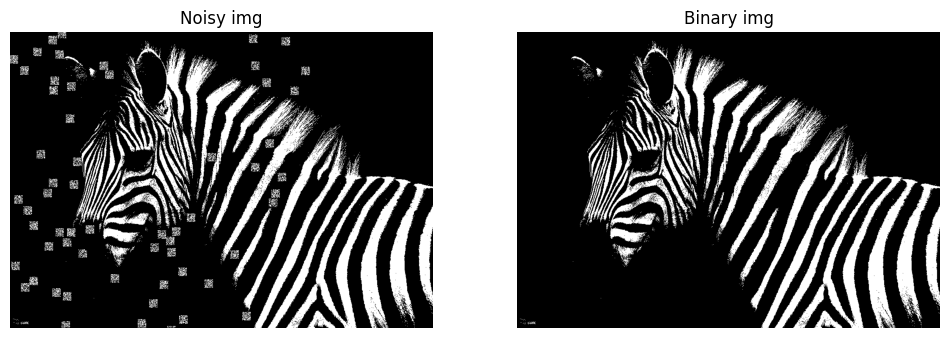

In [116]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(add_noise(img, 200, 10), cmap='gray')
axs[0].set_title('Noisy img')
axs[0].axis('off') 

axs[1].imshow(img, cmap='gray')
axs[1].set_title('Binary img')
axs[1].axis('off')

plt.show()

### Did you find some artefacts? If so, what do you think where these artefacts came from?

## Gabor filters

### Plot the gabor filter(s) with different parameters to understand how they work

### Write a function that applies a gabor filter to an image of your choice (consider using the inital zebra image in both color and greyscale representation)

## Filter bank

#### Use a second rgb image and repeat your filter bank. Is it still working appropriately?